In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import rand_score

RANDOM_SEED = 42

In [30]:
df = pd.read_excel('data3.xlsx')
df = df.drop(df.columns[[0, 1]], axis=1)
X = df

In [31]:
mean_X = X.mean()
std_X = X.std()

#нормализация тренировочных и тестовых данных
for column in X.columns:
    X[column] = (X[column] - mean_X[column]) / std_X[column]

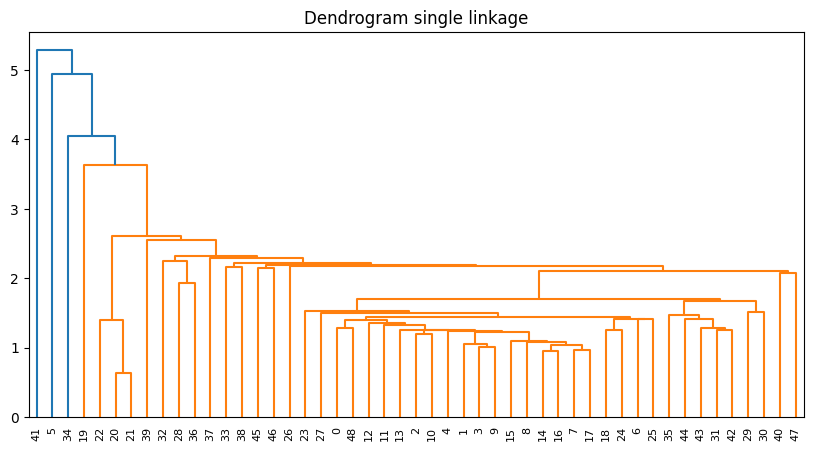

In [32]:
# Построение матрицы связей
Z = linkage(X, method='single')

# Построение дендрограммы
plt.figure(figsize=(10, 5))
plt.title(f'Dendrogram single linkage')
dendrogram(Z)
plt.show()

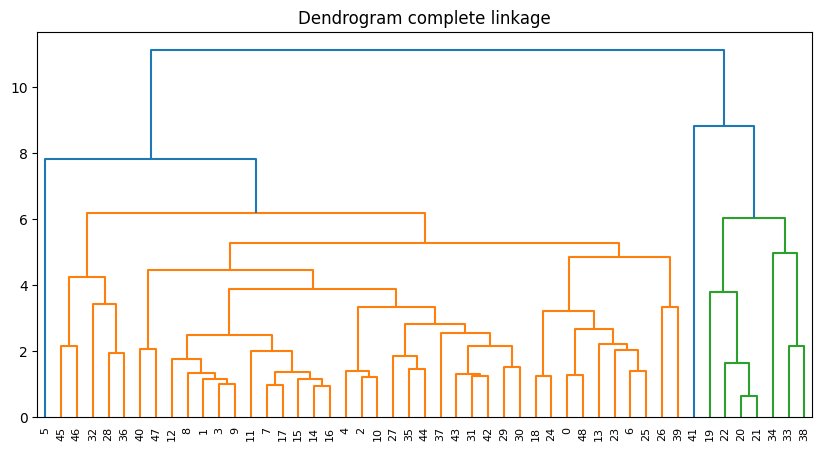

In [33]:
# Построение матрицы связей
Z = linkage(X, method='complete')

# Построение дендрограммы
plt.figure(figsize=(10, 5))
plt.title(f'Dendrogram complete linkage')
dendrogram(Z)
plt.show()

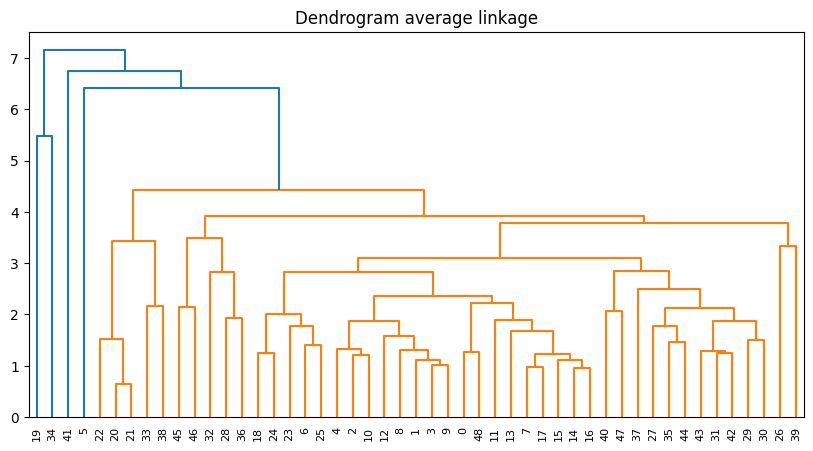

In [34]:
# Построение матрицы связей
Z = linkage(X, method='average')

# Построение дендрограммы
plt.figure(figsize=(10, 5))
plt.title(f'Dendrogram average linkage')
dendrogram(Z)
plt.show()

In [35]:
best_model = AgglomerativeClustering(linkage='average', n_clusters=4)

best_model.fit(X)

# Предсказание кластеров
predicted_labels = best_model.fit_predict(X)
predicted_labels

array([1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1])

In [36]:
def davies_bouldin_score(estimator, X):
    estimator.fit(X)
    labels = estimator.labels_
    score = metrics.davies_bouldin_score(X, labels)
    return -score

kmeans = KMeans()

param_grid = {'n_clusters': range(2, 50, 1)}
grid = GridSearchCV(kmeans, param_grid=param_grid, scoring=davies_bouldin_score)
grid.fit(X)

print(grid.best_params_)

/Users/radicalovich/PycharmProjects/PAD/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/radicalovich/PycharmProjects/PAD/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/radicalovich/PycharmProjects/PAD/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/radicalovich/PycharmProjects/PAD/venv/lib/python3.11/site-packages/sklearn/

{'n_clusters': 8}


In [37]:
knn = KMeans(n_clusters=4, random_state=RANDOM_SEED)
knn.fit(X)
knn.labels_

/Users/radicalovich/PycharmProjects/PAD/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 1, 1, 1, 0, 1, 3, 0, 0, 0, 3, 2, 2, 0, 3, 0, 2, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0], dtype=int32)

In [38]:
# Вычисление индекса Рэнда между предсказанными метками из пункта 3 и пункта 4
rand_index = rand_score(predicted_labels, knn.predict(X))
print("Индекс Рэнда между кластеризациями из пунктов 3 и 4:", rand_index)

Индекс Рэнда между кластеризациями из пунктов 3 и 4: 0.4217687074829932


/Users/radicalovich/PycharmProjects/PAD/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/radicalovich/PycharmProjects/PAD/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/radicalovich/PycharmProjects/PAD/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/radicalovich/PycharmProjects/PAD/venv/lib/python3.11/site-packages/sklearn/

2 1.4660076290312223
3 1.6077510074639136
4 1.43670550657394
5 1.1657721108551067
6 1.158267971706753
7 1.0791024004872625
8 0.9747002591374985
9 1.0939806258550373
10 0.9192532067473869
11 0.866116783644637
12 0.9212932184231789
13 0.8430082583062154
14 0.8032618940786772
15 0.8038995420603423
16 0.7629571585351763
17 0.8220284083359506
18 0.7595098417819073
19 0.8088066213392783
20 0.700392919844087
21 0.6480318779931278
22 0.7092317981188928
23 0.6326948582021145
24 0.6940850115679762
25 0.5922924290817501
26 0.634260593924256
27 0.5454776683990046
28 0.5297786019531415
29 0.5602277733903274
30 0.5392435187349548
31 0.478046885818328
32 0.5233699996162136
33 0.46669164801109103
34 0.438071312192802
35 0.4163095051987582
36 0.40761515568905826
37 0.424115837789796


/Users/radicalovich/PycharmProjects/PAD/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/radicalovich/PycharmProjects/PAD/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/radicalovich/PycharmProjects/PAD/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/radicalovich/PycharmProjects/PAD/venv/lib/python3.11/site-packages/sklearn/

38 0.40889601967219164
39 0.396087324038418
40 0.3519073963457654
41 0.3448042305371229
42 0.323530408837394
43 0.3097241591502935
44 0.2930083158485463
45 0.2678183101187421
46 0.2380099024081198
47 0.20618942449775787


/Users/radicalovich/PycharmProjects/PAD/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/radicalovich/PycharmProjects/PAD/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/radicalovich/PycharmProjects/PAD/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/radicalovich/PycharmProjects/PAD/venv/lib/python3.11/site-packages/sklearn/

48 0.07972977269685241


Text(0.5, 1.0, 'F1 Score vs. Threshold')

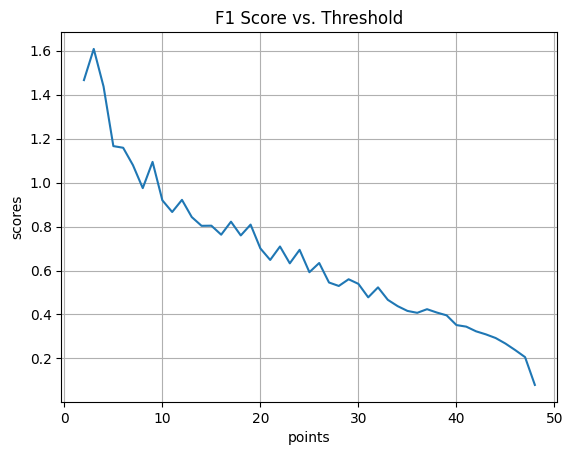

In [43]:
scores = []
points = []

for i in range (2,49):
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(X)
    labels = kmeans.labels_
    score = metrics.davies_bouldin_score(X, labels)
    scores.append(score)
    points.append(i)
    print(i, score)

plt.figure
plt.plot(points, scores)
plt.xlabel('points')
plt.ylabel('scores')
plt.grid(True)
plt.title('F1 Score vs. Threshold')

In [ ]:
labels = knn.labels_

# Добавление меток кластеров к исходным данным
X_labeled = X.copy()
X_labeled['Cluster'] = labels

# Расчет средних значений для каждого кластера
cluster_means = X_labeled.groupby('Cluster').mean()
cluster_means